# Fake Review & Bot Detector

In [ ]:
!pip install opendatasets

# Dependent Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
od.download("https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lasertron
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products


100%|██████████| 16.3M/16.3M [00:00<00:00, 1.19GB/s]

In [ ]:
df=pd.read_csv("/content/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [ ]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [ ]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


In [ ]:
df.duplicated().sum()

np.int64(95)

In [ ]:
df[['reviews.text', 'reviews.rating', 'reviews.title', 'reviews.username']].head()

,reviews.text,reviews.rating,reviews.title,reviews.username
0,I thought it would be as big as small paper bu...,3,Too small,llyyue
1,This kindle is light and easy to use especiall...,5,Great light reader. Easy to use at the beach,Charmi
2,Didnt know how much i'd use a kindle so went f...,4,Great for the price,johnnyjojojo
3,I am 100 happy with my purchase. I caught it o...,5,A Great Buy,Kdperry
4,Solid entry level Kindle. Great for kids. Gift...,5,Solid entry-level Kindle. Great for kids,Johnnyblack


importing relevant columns for NLP analysis

In [ ]:
cols_to_use=['reviews.text','reviews.rating','reviews.username','reviews.date','reviews.title','reviews.doRecommend']
#loads just those 6 columns from a big CSV
#saves RAM, loads faster, less I/O. You keep only fields relevant for an NLP/review model:
df=pd.read_csv("/content/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv",usecols=cols_to_use)
#Drop rows with empty review text
#removes rows where the main text is missing.
#your model/analysis needs actual text; empty strings/NaN provide no signal and can break preprocessing (tokenization).
df=df.dropna(subset=['reviews.text'])

In [ ]:
# the column reviews.text may contain:Actual strings (normal reviews) Missing values (NaN or None) Sometimes even numeric types (e.g., 12345 by mistake)
#If you directly use string methods like .str.len() or .str.split() on a mixed-type column, pandas can throw an error.
# we converting the reviews.text value into string and then apply string operation
df['review_length']= df['reviews.text'].astype(str).str.len()
df['word_count']=df['reviews.text'].astype(str).str.split().apply(len)

In [ ]:
def is_suspicious(row):
  review=str(row['reviews.text']).lower()

  if len(review)<30 and row['reviews.rating']==5:
    return 1

  repeated_phrases=['love it','great product','amazing','nice product','very good']
  if any(phase in review for phase in repeated_phrases)  and row['reviews.rating']==5:
    return 1

  if row['user_review_count']>=3 and row['reviews.rating']==5:
    return 1

  return 0

user_review_counts=df['reviews.username'].value_counts()
df['user_review_count']=df['reviews.username'].map(user_review_counts)
df['label']= df.apply(is_suspicious,axis=1)



In [ ]:
df['label'].value_counts()

,count
label,
0,4021
1,979


# Feature Extraction + Baseline Model

vectorize the  review text using tf-IDF,
 Build a simple Logistic  Regression model,
 Evaluate Model Accuracy.

## TF-IDF Vectorization

In [ ]:
tfidf=TfidfVectorizer(max_features=5000,stop_words='english')
X=tfidf.fit_transform(df['reviews.text'].astype(str))
y=df['label']

Train-test-split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,
stratify=y)

In [ ]:
model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred=model.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("\nclassification Report:\n",classification_report(y_test,y_pred))
print("\n confusion matrix:",confusion_matrix(y_test,y_pred))


accuracy: 0.767

classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       804
           1       0.43      0.60      0.50       196

    accuracy                           0.77      1000
   macro avg       0.66      0.70      0.68      1000
weighted avg       0.80      0.77      0.78      1000


 confusion matrix: [[649 155]
 [ 78 118]]


RandomForestClassifier algorithm for performance

In [ ]:
rf_model=RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

In [ ]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test,y_pred))

accuracy: 0.876

classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       804
           1       0.90      0.41      0.57       196

    accuracy                           0.88      1000
   macro avg       0.89      0.70      0.75      1000
weighted avg       0.88      0.88      0.86      1000



Feature Importance Visualization

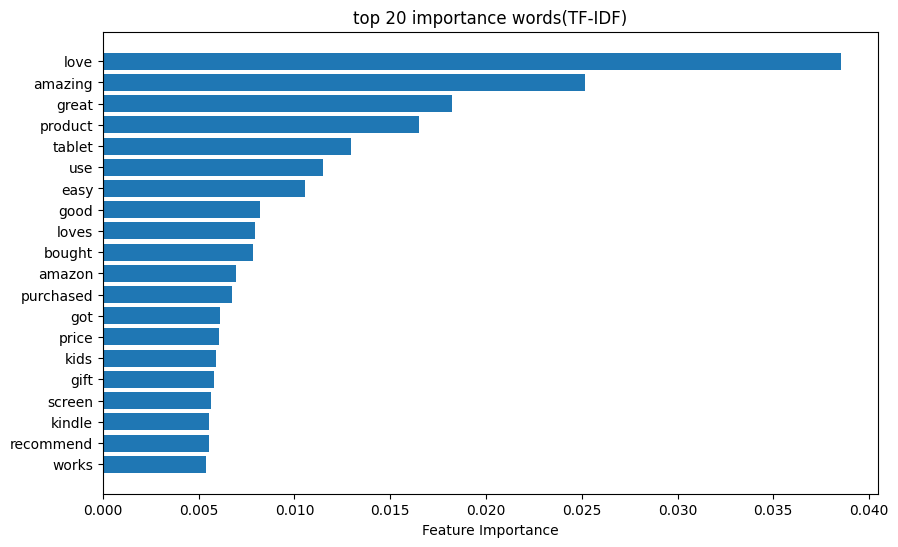

In [ ]:
importances=rf_model.feature_importances_
feature_names=tfidf.get_feature_names_out()
top_indices=importances.argsort()[-20:][::-1]

plt.figure(figsize=(10,6))

plt.barh(range(20),importances[top_indices],align='center')
plt.yticks(range(20),[feature_names[i] for i in top_indices])
plt.xlabel("Feature Importance")
plt.title("top 20 importance words(TF-IDF)")
plt.gca().invert_yaxis()
plt.show()



In [ ]:
import joblib
joblib.dump(rf_model,'fake_review_detection.pk1')


['fake_review_detection.pk1']

In [ ]:
#confirmation
model=joblib.load('/content/fake_review_detection.pk1')

In [ ]:
!pip freeze > requirements.txt


In [ ]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(tfidf, "tfidf_vectorizer.pk1")


['tfidf_vectorizer.pk1']